In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdat

In [4]:

rad0=50
ecc0=0.5
theta0= 0. #math.pi/6. #math.pi/6.
mass0=1.0
initdateqellipse=initdat.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0)
print(initdateqellipse)

angle 0.0
0.5
(array([3.14159265, 0.        ]), 0.0, 50, 0.5, array([1., 1.]))


In [5]:
import getxyuvtwoellipse_apper

In [6]:
useperihelion=True

In [7]:
xyuvaeqellipse=getxyuvtwoellipse_apper.getxyuveqtwoellipses(initdateqellipse,useperihelion)
print(xyuvaeqellipse)
masses,xvec,avec=xyuvaeqellipse

initdat 50 [3.14159265 0.        ] 0.5 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 50
pi
zero
[-50.  50.]
[0. 0.]
(array([1., 1.]), array([[-25.        ,   0.        ,   0.        ,  -0.        ,
         -0.12247449,   0.        ],
       [ 25.        ,   0.        ,   0.        ,  -0.        ,
          0.12247449,   0.        ]]), array([[ 0.0004, -0.    ,  0.    ],
       [-0.0004, -0.    ,  0.    ]]))


In [8]:
import RK4implicit

In [9]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [10]:
import OrbitDiffEqAdaptive

In [11]:
masses, xvec,avec=xyuvaeqellipse
delta=0.005 #with dtmin=0.001, accuracy of 1e-6 appears to be too much to ask. try 0.05
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-25.           0.           0.          -0.          -0.12247449
    0.        ]
 [ 25.           0.           0.          -0.           0.12247449
    0.        ]] 0.0
[1. 1.] [[-25.           0.           0.          -0.          -0.12247449
    0.        ]
 [ 25.           0.           0.          -0.           0.12247449
    0.        ]] 0.0


In [12]:
print(xyuvaeqellipse)

(array([1., 1.]), array([[-25.        ,   0.        ,   0.        ,  -0.        ,
         -0.12247449,   0.        ],
       [ 25.        ,   0.        ,   0.        ,  -0.        ,
          0.12247449,   0.        ]]), array([[ 0.0004, -0.    ,  0.    ],
       [-0.0004, -0.    ,  0.    ]]))


In [13]:
import timestepAdaptive

In [14]:
numsteps=100000/20

#numsteps=6000*10
dt=.01
dtmax=1
dtmin = 0.001
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a,nperr,npdt= timestepAdaptive.timestepAdaptive(numsteps,dt,dtmax,dtmin,xyuvaeqellipse,outputevery,delta)

0.01
[-5.99999979e-08  1.22474487e-03  0.00000000e+00]
[3.59999974e-15 1.49999999e-06 0.00000000e+00]
1.4999999979999992e-06
0.001224744870575092
1.224744872208086 False
0.010519895056839758
[-1.08480496e-07  1.28841874e-03  0.00000000e+00]
[1.17680179e-14 1.66002286e-06 0.00000000e+00]
1.6600228739748655e-06
0.0012884187494657416
1.2247448736525248 False
0.011066819203955153
[-1.64320678e-07  1.35540299e-03  0.00000000e+00]
[2.70012852e-14 1.83711727e-06 0.00000000e+00]
1.8371172955948182e-06
0.0013554030011752292
1.2247448759918025 False
0.011642177672854524
[-2.28419431e-07  1.42586971e-03  0.00000000e+00]
[5.21754364e-14 2.03310444e-06 0.00000000e+00]
2.033104488039541e-06
0.0014258697303889795
1.2247448793598963 False
0.012247448753030778
[-3.01777447e-07  1.49999996e-03  0.00000000e+00]
[9.10696278e-14 2.24999988e-06 0.00000000e+00]
2.24999996838691e-06
0.0014999999894623034
1.2247448839070711 False
0.012884187590358696
[-3.85508393e-07  1.57798420e-03  0.00000000e+00]
[1.4861672

1.225360846533258 False
0.7071481053611984
[-0.00408393  0.08646296  0.        ]
[1.66784957e-05 7.47584345e-03 0.00000000e+00]
0.007492521950384225
0.08655935507144347
1.2254275198403566 False
0.7440160245149987
[-0.00452276  0.09095435  0.        ]
[2.04553961e-05 8.27269425e-03 0.00000000e+00]
0.008293149648713508
0.0910667318438161
1.2255013594717925 False
0.7828178838434627
[-0.00500861  0.09567864  0.        ]
[2.50861576e-05 9.15440155e-03 0.00000000e+00]
0.009179487707318107
0.09580964308104956
1.2255831333928093 False
0.8236570738322003
[-0.0055465   0.10064782  0.        ]
[3.07636244e-05 1.01299838e-02 0.00000000e+00]
0.010160747396253134
0.10080053271810191
1.2256736918280495 False
0.8666428308407034
[-0.006142    0.10587452  0.        ]
[3.77241780e-05 1.12094138e-02 0.00000000e+00]
0.011247137952038536
0.10605252449630105
1.2257739760889856 False
0.911890618943073
[-0.00680129  0.11137198  0.        ]
[4.62575696e-05 1.24037189e-02 0.00000000e+00]
0.012449976504756296
0.1

1
[-0.04787421  0.10696647  0.        ]
[0.00229194 0.01144183 0.        ]
0.013733765517063547
0.11719114948264459
1.2799601391589237 False
1
[-0.0481578   0.10676027  0.        ]
[0.00231917 0.01139776 0.        ]
0.013716929245290747
0.11711929493166677
1.2807454150703133 False
1
[-0.04844001  0.10655323  0.        ]
[0.00234643 0.01135359 0.        ]
0.01370002427996349
0.11704710282601398
1.2815353509686542 False
1
[-0.04872081  0.10634535  0.        ]
[0.00237372 0.01130933 0.        ]
0.013683051562902324
0.11697457656645877
1.2823299250395486 False
1
[-0.04900021  0.10613666  0.        ]
[0.00240102 0.01126499 0.        ]
0.013666012033559808
0.11690171954919999
1.2831291154521474 False
1
[-0.04927822  0.10592716  0.        ]
[0.00242834 0.01122056 0.        ]
0.013648906628911666
0.11682853516547945
1.283932900361504 False
1
[-0.04955481  0.10571687  0.        ]
[0.00245568 0.01117606 0.        ]
0.013631736283371406
0.11675502680129625
1.2847412579098878 False
1
[-0.04983001 

[-0.07252042  0.07834082  0.        ]
[0.00525921 0.00613728 0.        ]
0.011396495332270851
0.10675436914839061
1.40509471599703 False
1
[-0.07264341  0.07810212  0.        ]
[0.00527706 0.00609994 0.        ]
0.011377005233381574
0.10666304530333631
1.4062977442038975 False
1
[-0.07276532  0.07786358  0.        ]
[0.00529479 0.00606274 0.        ]
0.011357528650122397
0.1065717066116631
1.407503030298514 False
1
[-0.07288616  0.07762521  0.        ]
[0.00531239 0.00602567 0.        ]
0.011338065937584262
0.10648035470256596
1.408710559041604 False
1
[-0.07300594  0.07738702  0.        ]
[0.00532987 0.00598875 0.        ]
0.01131861744635917
0.1063889911896864
1.4099203152754527 False
1
[-0.07312466  0.077149    0.        ]
[0.00534722 0.00595197 0.        ]
0.011299183522566522
0.10629761767117137
1.4111322839239981 False
1
[-0.07324232  0.07691117  0.        ]
[0.00536444 0.00591533 0.        ]
0.011279764507882806
0.10620623572974802
1.4123464499927239 False
1
[-0.07335893  0.0766

1
[-0.08083644  0.05231973  0.        ]
[0.00653453 0.00273735 0.        ]
0.009271884625096007
0.09629062584226986
1.5577840385595738 False
1
[-0.08086483  0.05211827  0.        ]
[0.00653912 0.00271631 0.        ]
0.009255435404323553
0.0962051734800346
1.5591677097399486 False
1
[-0.08089266  0.0519172   0.        ]
[0.00654362 0.0026954  0.        ]
0.009239018358313682
0.09611981251705437
1.5605523572300535 False
1
[-0.08091992  0.05171653  0.        ]
[0.00654803 0.0026746  0.        ]
0.009222633509807168
0.09603454331545065
1.561937973790177 False
1
[-0.08094663  0.05151625  0.        ]
[0.00655236 0.00265392 0.        ]
0.009206280880140609
0.09594936623105235
1.563324552230915 False
1
[-0.08097278  0.05131637  0.        ]
[0.00655659 0.00263337 0.        ]
0.009189960489260612
0.09586428161343834
1.5647120854131855 False
1
[-0.08099838  0.05111688  0.        ]
[0.00656074 0.00261294 0.        ]
0.009173672355741892
0.09577928980600081
1.5661005662479042 False
1
[-0.08102343  

[-0.08096976  0.03030994  0.        ]
[0.0065561  0.00091869 0.        ]
0.007474794150243918
0.08645689186088011
1.7349686852190875 False
1
[-0.08094959  0.03015579  0.        ]
[0.00655284 0.00090937 0.        ]
0.007462207876873099
0.08638407189333633
1.7364312275672085 False
1
[-0.08092917  0.03000199  0.        ]
[0.00654953 0.00090012 0.        ]
0.007449650120751343
0.08631135568829483
1.7378941485024355 False
1
[-0.0809085   0.02984854  0.        ]
[0.00654619 0.00089094 0.        ]
0.007437120825085881
0.08623874317895572
1.7393574450491704 False
1
[-0.08088758  0.02969543  0.        ]
[0.0065428  0.00088182 0.        ]
0.007424619932939145
0.08616623429707918
1.7408211142526933 False
1
[-0.08086642  0.02954268  0.        ]
[0.00653938 0.00087277 0.        ]
0.007412147387229439
0.08609382897298411
1.7422851531794386 False
1
[-0.08084501  0.02939027  0.        ]
[0.00653592 0.00086379 0.        ]
0.007399703130735584
0.08602152713556988
1.7437495589168055 False
1
[-0.08082336 

1.915470852936254 False
1
[-0.07703081  0.01375234  0.        ]
[0.00593375 0.00018913 0.        ]
0.00612287254635141
0.07824878622925349
1.9169626422131278 False
1
[-0.07698974  0.01363575  0.        ]
[0.00592742 0.00018593 0.        ]
0.006113353120672644
0.07818793462339726
1.918454563642015 False
1
[-0.07694856  0.01351942  0.        ]
[0.00592108 0.00018277 0.        ]
0.006103855046115595
0.0781271722649399
1.9199466159011813 False
1
[-0.07690727  0.01340336  0.        ]
[0.00591473 0.00017965 0.        ]
0.006094378267953937
0.0780664990117652
1.9214387976767586 False
1
[-0.07686588  0.01328755  0.        ]
[0.00590836 0.00017656 0.        ]
0.0060849227315677625
0.07800591472169122
1.9229311076623947 False
1
[-0.07682439  0.013172    0.        ]
[0.00590199 0.0001735  0.        ]
0.006075488382442481
0.0779454192524646
1.9244235445594458 False
1
[-0.07678279  0.01305672  0.        ]
[0.0058956  0.00017048 0.        ]
0.006066075166170343
0.07788501246177176
1.9259161070767545

1
[-0.07216757  0.00263442  0.        ]
[5.20815872e-03 6.94018950e-06 0.00000000e+00]
0.005215098906779678
0.07221564170440971
2.077112332726672 False
1
[-0.07211874  0.00254229  0.        ]
[5.20111319e-03 6.46325300e-06 0.00000000e+00]
0.00520757643837765
0.07216353953609572
2.0786120105011063 False
1
[-0.07206987  0.00245036  0.        ]
[5.19406586e-03 6.00426230e-06 0.00000000e+00]
0.0052000701237486695
0.07211151172835492
2.0801117103889335 False
1
[-0.07202095  0.00235862  0.        ]
[5.18701681e-03 5.56310584e-06 0.00000000e+00]
0.0051925799207772185
0.07205955815002767
2.0816114315841445 False
1
[-0.07197198  0.00226708  0.        ]
[5.17996611e-03 5.13967268e-06 0.00000000e+00]
0.005185105787466101
0.07200767867016754
2.0831111732830285 False
1
[-0.07192297  0.00217574  0.        ]
[5.17291383e-03 4.73385248e-06 0.00000000e+00]
0.005177647681934774
0.07195587315803188
2.084610934684442 False
1
[-0.07187392  0.00208459  0.        ]
[5.16586003e-03 4.34553554e-06 0.00000000e+

1
[-0.06612653 -0.00707035  0.        ]
[4.37271764e-03 4.99898774e-05 0.00000000e+00]
0.004422707519816678
0.06650343990965188
2.2555224241600467 False
1
[-0.06607444 -0.00714219  0.        ]
[4.36583146e-03 5.10108240e-05 0.00000000e+00]
0.004416842281842978
0.06645932802732042
2.2570195103136954 False
1
[-0.06602234 -0.00721387  0.        ]
[4.35894897e-03 5.20399862e-05 0.00000000e+00]
0.0044109889549631826
0.06641527651800587
2.258516532101367 False
1
[-0.06597022 -0.00728542  0.        ]
[4.35207020e-03 5.30773065e-05 0.00000000e+00]
0.0044051475095264695
0.0663712852785485
2.2600134888224117 False
1
[-0.06591809 -0.00735682  0.        ]
[4.34519519e-03 5.41227277e-05 0.00000000e+00]
0.004399317915974275
0.06632735420604591
2.261510379775214 False
1
[-0.06586595 -0.00742807  0.        ]
[4.33832395e-03 5.51761931e-05 0.00000000e+00]
0.004393500144836351
0.06628348319782501
2.2630072042581193 False
1
[-0.0658138  -0.00749918  0.        ]
[4.33145652e-03 5.62376461e-05 0.00000000e+

0.0038430273016521995
0.06199215516218322
2.4196609975499577 False
1
[-0.0602983 -0.0142277  0.       ]
[0.00363588 0.00020243 0.        ]
0.0038383124827631315
0.06195411594690971
2.4211466455035753 False
1
[-0.06024563 -0.01428533  0.        ]
[0.00362954 0.00020407 0.        ]
0.0038336067987335323
0.0619161271296383
2.422632146967689 False
1
[-0.06019296 -0.01434286  0.        ]
[0.00362319 0.00020572 0.        ]
0.003828910228339073
0.06187818863169051
2.424117501125081 False
1
[-0.0601403  -0.01440027  0.        ]
[0.00361686 0.00020737 0.        ]
0.0038242227504205694
0.06184030037459851
2.425602707156544 False
1
[-0.06008763 -0.01445756  0.        ]
[0.00361052 0.00020902 0.        ]
0.0038195443438791147
0.06180246228006708
2.427087764242347 False
1
[-0.06003496 -0.01451475  0.        ]
[0.0036042  0.00021068 0.        ]
0.00381487498768336
0.061764674270033675
2.428572671559856 False
1
[-0.0599823  -0.01457183  0.        ]
[0.00359788 0.00021234 0.        ]
0.003810214660861

0.0034135673742264425
0.05842574239345567
2.567361472103462 False
1
[-0.05504815 -0.01947747  0.        ]
[0.0030303  0.00037937 0.        ]
0.003409670576431172
0.05839238457565483
2.5688281287032515 False
1
[-0.05499592 -0.01952511  0.        ]
[0.00302455 0.00038123 0.        ]
0.0034057810771886982
0.05835907022210599
2.5702945476876544 False
1
[-0.0549437  -0.01957266  0.        ]
[0.00301881 0.00038309 0.        ]
0.003401898860756407
0.05832579927233237
2.5717607280377983 False
1
[-0.05489148 -0.01962011  0.        ]
[0.00301308 0.00038495 0.        ]
0.0033980239114368353
0.058292571666009346
2.573226668732916 False
1
[-0.05483928 -0.01966748  0.        ]
[0.00300735 0.00038681 0.        ]
0.0033941562135812926
0.05825938734299643
2.5746923687489143 False
1
[-0.05478708 -0.01971477  0.        ]
[0.00300162 0.00038867 0.        ]
0.0033902957515854217
0.058226246243300125
2.5761578270599905 False
1
[-0.05473488 -0.01976196  0.        ]
[0.00299591 0.00039053 0.        ]
0.003386

0.05509173538121235
2.722731439880431 False
1
[-0.04950648 -0.02410417  0.        ]
[0.00245089 0.00058101 0.        ]
0.00303190264529179
0.05506271556408919
2.724166406675137 False
1
[-0.04945519 -0.02414325  0.        ]
[0.00244582 0.0005829  0.        ]
0.0030287118325969344
0.05503373358765453
2.7256010127150234 False
1
[-0.0494039  -0.02418225  0.        ]
[0.00244075 0.00058478 0.        ]
0.0030255268576844956
0.05500478940678253
2.7270352567062788 False
1
[-0.04935263 -0.02422119  0.        ]
[0.00243568 0.00058667 0.        ]
0.003022347709036988
0.05497588297641965
2.728469137354979 False
1
[-0.04930136 -0.02426006  0.        ]
[0.00243062 0.00058855 0.        ]
0.0030191743751748594
0.05494701425168486
2.7299026533621067 False
1
[-0.0492501  -0.02429885  0.        ]
[0.00242557 0.00059043 0.        ]
0.003016006844647112
0.05491818318778501
2.7313358034277293 False
1
[-0.04919886 -0.02433757  0.        ]
[0.00242053 0.00059232 0.        ]
0.003012845106039073
0.054889389740

0.05214248948748324
2.8767326123929577 False
1
[-0.04397579 -0.02797049  0.        ]
[0.00193387 0.00078235 0.        ]
0.002716218506900252
0.052117353222321756
2.8781200641585016 False
1
[-0.04392563 -0.02800253  0.        ]
[0.00192946 0.00078414 0.        ]
0.002713602567696482
0.05209225055319152
2.8795069978179315 False
1
[-0.04387548 -0.02803451  0.        ]
[0.00192506 0.00078593 0.        ]
0.0027109913838261456
0.05206718144691669
2.880893411772776 False
1
[-0.04382534 -0.02806643  0.        ]
[0.00192066 0.00078772 0.        ]
0.0027083849468001048
0.05204214587043952
2.8822793044204884 False
1
[-0.04377521 -0.0280983   0.        ]
[0.00191627 0.00078951 0.        ]
0.002705783248152163
0.05201714379079423
2.883664674155876 False
1
[-0.04372509 -0.0281301   0.        ]
[0.00191188 0.0007913  0.        ]
0.002703186279439049
0.05199217517510735
2.8850495193710715 False
1
[-0.04367498 -0.02816185  0.        ]
[0.0019075  0.00079309 0.        ]
0.0027005940322394895
0.051967239

1
[-0.03857067 -0.03114023  0.        ]
[0.0014877  0.00096971 0.        ]
0.002457410634450261
0.049572276873775536
3.0258848182814093 False
1
[-0.03852166 -0.03116648  0.        ]
[0.00148392 0.00097135 0.        ]
0.002455267583620556
0.04955065674257563
3.0272050838655145 False
1
[-0.03847266 -0.03119268  0.        ]
[0.00148015 0.00097298 0.        ]
0.0024531284863993307
0.04952906708589746
3.028524638670408 False
1
[-0.03842367 -0.03121883  0.        ]
[0.00147638 0.00097462 0.        ]
0.0024509933364705943
0.04950750787982156
3.029843480793294 False
1
[-0.03837469 -0.03124493  0.        ]
[0.00147262 0.00097625 0.        ]
0.002448862127534666
0.04948597910049538
3.031161608329144 False
1
[-0.03832572 -0.03127098  0.        ]
[0.00146886 0.00097787 0.        ]
0.0024467348533068808
0.04946448072412042
3.0324790193714763 False
1
[-0.03827676 -0.03129699  0.        ]
[0.00146511 0.0009795  0.        ]
0.0024446115075231556
0.049443012727008816
3.0337957120088834 False
1
[-0.0382

1
[-0.03328741 -0.03373129  0.        ]
[0.00110805 0.0011378  0.        ]
0.002245851660676962
0.04739041739293886
3.165196853116341 False
1
[-0.03323948 -0.03375267  0.        ]
[0.00110486 0.00113924 0.        ]
0.002244105671957961
0.047371992484567936
3.1664279278281255 False
1
[-0.03319155 -0.03377401  0.        ]
[0.00110168 0.00114068 0.        ]
0.002242363038582727
0.04735359583582568
3.1676580701505355 False
1
[-0.03314363 -0.03379532  0.        ]
[0.0010985  0.00114212 0.        ]
0.0022406237558246327
0.0473352274297339
3.1688872779298536 False
1
[-0.03309572 -0.03381658  0.        ]
[0.00109533 0.00114356 0.        ]
0.002238887818971898
0.047316887249394354
3.170115549008773 False
1
[-0.03304782 -0.0338378   0.        ]
[0.00109216 0.001145   0.        ]
0.0022371552233239767
0.04729857527795078
3.1713428812289326 False
1
[-0.03299994 -0.03385898  0.        ]
[0.001089   0.00114643 0.        ]
0.002235425964192422
0.047280291498598255
3.1725692724302923 False
1
[-0.03295

1
[-0.02849126 -0.03569258  0.        ]
[0.00081175 0.00127396 0.        ]
0.002085712481242022
0.04566960128183759
3.2844604680105607 False
1
[-0.02844421 -0.03571009  0.        ]
[0.00080907 0.00127521 0.        ]
0.0020842834807334835
0.04565395361557949
3.2855862005522396 False
1
[-0.02839717 -0.03572755  0.        ]
[0.0008064  0.00127646 0.        ]
0.002082857416502674
0.04563833275331904
3.2867107747070636 False
1
[-0.02835014 -0.03574498  0.        ]
[0.00080373 0.0012777  0.        ]
0.002081434284940428
0.04562273868303423
3.287834188169432 False
1
[-0.02830312 -0.03576238  0.        ]
[0.00080107 0.00127895 0.        ]
0.002080014082445632
0.045607171392727616
3.2889564386340906 False
1
[-0.02825611 -0.03577973  0.        ]
[0.00079841 0.00128019 0.        ]
0.0020785968054289504
0.04559163087046734
3.2900775237931823 False
1
[-0.0282091  -0.03579706  0.        ]
[0.00079575 0.00128143 0.        ]
0.002077182450309842
0.04557611710435458
3.2911974413385954 False
1
[-0.02816

1
[-0.02331641 -0.03742485  0.        ]
[0.00054365 0.00140062 0.        ]
0.0019442739852371237
0.044093922316313885
3.4018293705865887 False
1
[-0.0232702 -0.0374386  0.       ]
[0.0005415  0.00140165 0.        ]
0.0019431508953245652
0.04408118527585851
3.4028123123574208 False
1
[-0.02322399 -0.03745232  0.        ]
[0.00053935 0.00140268 0.        ]
0.0019420303954723614
0.044068473940815804
3.4037938368696588 False
1
[-0.0231778  -0.03746602  0.        ]
[0.00053721 0.0014037  0.        ]
0.001940912483023076
0.04405578830327606
3.40477394178975 False
1
[-0.0231316  -0.03747968  0.        ]
[0.00053507 0.00140473 0.        ]
0.0019397971553217282
0.04404312835530338
3.4057526247891516 False
1
[-0.02308542 -0.0374933   0.        ]
[0.00053294 0.00140575 0.        ]
0.001938684409725117
0.044030494089041486
3.4067298835361624 False
1
[-0.02303924 -0.0375069   0.        ]
[0.00053081 0.00140677 0.        ]
0.0019375742435945344
0.04401788549663119
3.407705715702312 False
1
[-0.02299

1
[-0.01813462 -0.03878548  0.        ]
[0.00032886 0.00150431 0.        ]
0.0018331782444942788
0.042815630843119415
3.503393434739159 False
1
[-0.0180891  -0.03879584  0.        ]
[0.00032722 0.00150512 0.        ]
0.0018323326644324688
0.04280575503869157
3.5042017098966465 False
1
[-0.01804358 -0.03880617  0.        ]
[0.00032557 0.00150592 0.        ]
0.0018314894180379425
0.04279590422035668
3.5050083117217947 False
1
[-0.01799806 -0.03881647  0.        ]
[0.00032393 0.00150672 0.        ]
0.0018306485034117058
0.04278607838318097
3.5058132380499814 False
1
[-0.01795256 -0.03882674  0.        ]
[0.00032229 0.00150752 0.        ]
0.0018298099186613184
0.042776277522258974
3.5066164867185163 False
1
[-0.01790706 -0.03883698  0.        ]
[0.00032066 0.00150831 0.        ]
0.0018289736618976899
0.042766501632676125
3.5074180555697163 False
1
[-0.01786156 -0.03884719  0.        ]
[0.00031904 0.0015091  0.        ]
0.0018281397312409292
0.042756750709577185
3.5082179424453117 False
1
[

1
[-0.01293115 -0.03979435  0.        ]
[0.00016721 0.00158359 0.        ]
0.0017508048773239313
0.04184262034485808
3.584861530270608 False
1
[-0.01288616 -0.03980155  0.        ]
[0.00016605 0.00158416 0.        ]
0.0017502166377653932
0.04183559056312452
3.585463907188529 False
1
[-0.01284116 -0.03980873  0.        ]
[0.0001649  0.00158474 0.        ]
0.0017496305505432946
0.04182858532801814
3.5860643821373785 False
1
[-0.01279618 -0.03981588  0.        ]
[0.00016374 0.0015853  0.        ]
0.0017490466143889945
0.04182160463670655
3.586662953346988 False
1
[-0.01275119 -0.03982301  0.        ]
[0.00016259 0.00158587 0.        ]
0.0017484648280406989
0.04181464848639408
3.5872596190497203 False
1
[-0.01270621 -0.03983011  0.        ]
[0.00016145 0.00158644 0.        ]
0.001747885190240184
0.04180771687428272
3.5878543774838336 False
1
[-0.01266123 -0.03983718  0.        ]
[0.00016031 0.001587   0.        ]
0.0017473076997335888
0.04180080979758154
3.5884472268926837 False
1
[-0.0126

0.041265357350645564
3.635010324166098 False
1
[-0.00844826 -0.04038658  0.        ]
[7.13731194e-05 1.63107605e-03 0.00000000e+00]
0.001702449172274259
0.0412607461429657
3.635416564699536 False
1
[-0.00840358 -0.04039122  0.        ]
[7.06201713e-05 1.63145051e-03 0.00000000e+00]
0.0017020706774809773
0.041256159267204905
3.6358207517207517 False
1
[-0.0083589  -0.04039583  0.        ]
[6.98712576e-05 1.63182297e-03 0.00000000e+00]
0.001701694232096927
0.04125159672178675
3.636222883968477 False
1
[-0.00831423 -0.04040041  0.        ]
[6.91263773e-05 1.63219346e-03 0.00000000e+00]
0.0017013198353272667
0.041247058505149994
3.63662296018688 False
1
[-0.00826955 -0.04040497  0.        ]
[6.83855295e-05 1.63256196e-03 0.00000000e+00]
0.0017009474863817443
0.041242544615745336
3.6370209791258583 False
1
[-0.00822488 -0.04040951  0.        ]
[6.76487134e-05 1.63292847e-03 0.00000000e+00]
0.0017005771844740055
0.04123805505202695
3.637416939541797 False
1
[-0.00818022 -0.04041402  0.      

3.667322967680309 False
1
[-0.003501   -0.04074974  0.        ]
[1.22569863e-05 1.66054091e-03 0.00000000e+00]
0.0016727978967718247
0.040899852038507725
3.667494930269506 False
1
[-0.00345651 -0.04075163  0.        ]
[1.19474830e-05 1.66069552e-03 0.00000000e+00]
0.0016726430044968273
0.04089795843922808
3.6676647374193756 False
1
[-0.00341203 -0.0407535   0.        ]
[1.16419445e-05 1.66084816e-03 0.00000000e+00]
0.0016724900999452723
0.040896089054398246
3.6678323885806376 False
1
[-0.00336755 -0.04075535  0.        ]
[1.13403705e-05 1.66099881e-03 0.00000000e+00]
0.0016723391827993812
0.040894243883453585
3.6679978832104587 False
1
[-0.00332306 -0.04075718  0.        ]
[1.10427605e-05 1.66114749e-03 0.00000000e+00]
0.0016721902527449518
0.040892422925830056
3.6681612207735235 False
1
[-0.00327858 -0.04075898  0.        ]
[1.07491142e-05 1.66129420e-03 0.00000000e+00]
0.001672043309472335
0.040890626180976185
3.668322400740967 False
1
[-0.0032341  -0.04076075  0.        ]
[1.0459431

1
[ 0.00161129 -0.04080893  0.        ]
[2.59625465e-06 1.66536858e-03 0.00000000e+00]
0.001667964838069691
0.04084072523927178
3.67280451366134 False
1
[ 0.00165574 -0.04080804  0.        ]
[2.74148517e-06 1.66529598e-03 0.00000000e+00]
0.001668037467865797
0.0408416144130689
3.67272455204419 False
1
[ 0.0017002  -0.04080712  0.        ]
[2.89066955e-06 1.66522141e-03 0.00000000e+00]
0.0016681120758151827
0.04084252778434732
3.672642418021117 False
1
[ 0.00174465 -0.04080619  0.        ]
[3.04380798e-06 1.66514485e-03 0.00000000e+00]
0.001668188662072649
0.04084346535337873
3.672558111859414 False
1
[ 0.00178911 -0.04080522  0.        ]
[3.20090064e-06 1.66506633e-03 0.00000000e+00]
0.0016682672267972713
0.04084442712044412
3.672471633833237 False
1
[ 0.00183356 -0.04080424  0.        ]
[3.36194770e-06 1.66498582e-03 0.00000000e+00]
0.0016683477701520705
0.04084541308582973
3.6723829842239657 False
1
[ 0.00187802 -0.04080323  0.        ]
[3.52694937e-06 1.66490334e-03 0.00000000e+00]


[ 0.00655153 -0.04056156  0.        ]
[4.29225247e-05 1.64523998e-03 0.00000000e+00]
0.0016881625015339947
0.04108725473348146
3.650767153293573 False
1
[ 0.00659612 -0.04055796  0.        ]
[4.35087553e-05 1.64494782e-03 0.00000000e+00]
0.001688456571515928
0.04109083318108709
3.650449221580657 False
1
[ 0.00664071 -0.04055433  0.        ]
[4.40989882e-05 1.64465367e-03 0.00000000e+00]
0.0016887526622540762
0.04109443590383102
3.65012918904713 False
1
[ 0.0066853  -0.04055068  0.        ]
[4.46932238e-05 1.64435755e-03 0.00000000e+00]
0.0016890507743699355
0.04109806290289039
3.6498070567080334 False
1
[ 0.00672989 -0.040547    0.        ]
[4.52914631e-05 1.64405945e-03 0.00000000e+00]
0.0016893509084887942
0.04110171417944505
3.6494828255852876 False
1
[ 0.00677449 -0.0405433   0.        ]
[4.58937067e-05 1.64375936e-03 0.00000000e+00]
0.0016896530652402585
0.041105389734683924
3.64915649670712 False
1
[ 0.00681909 -0.04053958  0.        ]
[4.64999552e-05 1.64345729e-03 0.00000000e+0

0.04155353630033016
3.609801074831944 False
1
[ 0.01097732 -0.04008354  0.        ]
[0.0001205  0.00160669 0.        ]
0.0017271921076939638
0.04155950081141452
3.609283005603421 False
1
[ 0.01102217 -0.04007745  0.        ]
[0.00012149 0.0016062  0.        ]
0.0017276899391281664
0.04156548976167809
3.608762963218941 False
1
[ 0.01106701 -0.04007132  0.        ]
[0.00012248 0.00160571 0.        ]
0.0017281898744304393
0.041571503153367446
3.6082409492534655 False
1
[ 0.01111187 -0.04006518  0.        ]
[0.00012347 0.00160522 0.        ]
0.001728691914670385
0.041577540988740364
3.6077169652871386 False
1
[ 0.01115672 -0.040059    0.        ]
[0.00012447 0.00160472 0.        ]
0.0017291960609227904
0.04158360327007257
3.607191012904693 False
1
[ 0.01120158 -0.0400528   0.        ]
[0.00012548 0.00160423 0.        ]
0.0017297023142669237
0.04158968999964924
3.60666309369618 False
1
[ 0.01124644 -0.04004657  0.        ]
[0.00012648 0.00160373 0.        ]
0.001730210675786336
0.0415958011

3.536241541500477 False
1
[ 0.01624989 -0.03919147  0.        ]
[0.00026406 0.00153597 0.        ]
0.0018000299488388429
0.04242675982017532
3.535504493762214 False
1
[ 0.01629521 -0.03918225  0.        ]
[0.00026553 0.00153525 0.        ]
0.0018007824813020868
0.04243562749980359
3.534765687173926 False
1
[ 0.01634053 -0.03917301  0.        ]
[0.00026701 0.00153452 0.        ]
0.0018015372768972581
0.0424445199866515
3.534025123789218 False
1
[ 0.01638586 -0.03916373  0.        ]
[0.0002685 0.0015338 0.       ]
0.0018022943372979724
0.04245343728484152
3.5332828056671675 False
1
[ 0.01643119 -0.03915443  0.        ]
[0.00026998 0.00153307 0.        ]
0.0018030536641851233
0.04246237939853493
3.532538734868339 False
1
[ 0.01647653 -0.03914511  0.        ]
[0.00027148 0.00153234 0.        ]
0.0018038152592454715
0.04247134633191502
3.5317929134561656 False
1
[ 0.01652187 -0.03913575  0.        ]
[0.00027297 0.00153161 0.        ]
0.0018045791241695138
0.04248033808916207
3.5310453434990

[0.00045422 0.00144356 0.        ]
0.0018977840842434013
0.043563563722948576
3.443244472696398 False
1
[ 0.02135843 -0.03798179  0.        ]
[0.00045618 0.00144262 0.        ]
0.0018987993629436789
0.043575215007429155
3.442323806650786 False
1
[ 0.02140437 -0.03796933  0.        ]
[0.00045815 0.00144167 0.        ]
0.0018998171274710745
0.04358689169315787
3.441401627259108 False
1
[ 0.02145032 -0.03795683  0.        ]
[0.00046012 0.00144072 0.        ]
0.0019008373801937667
0.043598593786884535
3.440477936816473 False
1
[ 0.02149627 -0.03794431  0.        ]
[0.00046209 0.00143977 0.        ]
0.0019018601234868473
0.04361032129538657
3.439552737619205 False
1
[ 0.02154223 -0.03793175  0.        ]
[0.00046407 0.00143882 0.        ]
0.0019028853597307747
0.04362207422545121
3.438626031966238 False
1
[ 0.02158819 -0.03791916  0.        ]
[0.00046605 0.00143786 0.        ]
0.0019039130913140485
0.04363385258390609
3.4376978221566894 False
1
[ 0.02163417 -0.03790655  0.        ]
[0.000468

1
[ 0.02640559 -0.03643714  0.        ]
[0.00069726 0.00132766 0.        ]
0.0020249201106064783
0.04499911233131692
3.333399087866189 False
1
[ 0.02645229 -0.03642116  0.        ]
[0.00069972 0.0013265  0.        ]
0.0020262246078979933
0.04501360469789099
3.332325882513202 False
1
[ 0.026499   -0.03640515  0.        ]
[0.0007022  0.00132533 0.        ]
0.0020275318963527533
0.04502812339363871
3.331251420111171 False
1
[ 0.02654572 -0.0363891   0.        ]
[0.00070468 0.00132417 0.        ]
0.002028841979196388
0.04504266842890625
3.3301757029949206 False
1
[ 0.02659244 -0.03637302  0.        ]
[0.00070716 0.001323   0.        ]
0.0020301548596645905
0.045057239814091925
3.329098733497798 False
1
[ 0.02663918 -0.03635691  0.        ]
[0.00070965 0.00132182 0.        ]
0.0020314705409999723
0.045071837559611125
3.3280205139542614 False
1
[ 0.02668592 -0.03634076  0.        ]
[0.00071214 0.00132065 0.        ]
0.0020327890264553007
0.04508646167593217
3.3269410466972227 False
1
[ 0.026

[ 0.03130595 -0.03458474  0.        ]
[0.00098006 0.0011961  0.        ]
0.0021761672706840573
0.046649408042161236
3.2154748858641806 False
1
[ 0.03135352 -0.03456498  0.        ]
[0.00098304 0.00119474 0.        ]
0.002177781032742472
0.04666670154127536
3.2142833122098695 False
1
[ 0.0314011  -0.03454518  0.        ]
[0.00098603 0.00119337 0.        ]
0.0021793979727301478
0.046684022670825484
3.213090719659434 False
1
[ 0.03144868 -0.03452533  0.        ]
[0.00098902 0.001192   0.        ]
0.0021810180949139828
0.04670137144575074
3.21189711043589 False
1
[ 0.03149627 -0.03450545  0.        ]
[0.00099202 0.00119063 0.        ]
0.0021826414035701026
0.04671874788101777
3.2107024867621994 False
1
[ 0.03154387 -0.03448553  0.        ]
[0.00099502 0.00118925 0.        ]
0.002184267902986349
0.046736151991647205
3.209506850859445 False
1
[ 0.03159149 -0.03446557  0.        ]
[0.00099802 0.00118788 0.        ]
0.0021858975974645466
0.04675358379273771
3.2083102049451804 False
1
[ 0.03163

3.076180737085662 False
1
[ 0.03673989 -0.03209188  0.        ]
[0.00134982 0.00102989 0.        ]
0.002379708648616756
0.04878225751865894
3.0748884457146297 False
1
[ 0.03678853 -0.03206735  0.        ]
[0.0013534  0.00102832 0.        ]
0.002381711374708143
0.04880278039935986
3.073595372487579 False
1
[ 0.03683718 -0.03204278  0.        ]
[0.00135698 0.00102674 0.        ]
0.00238371784021025
0.048823332948604095
3.0723015193965497 False
1
[ 0.03688585 -0.03201816  0.        ]
[0.00136057 0.00102516 0.        ]
0.002385728050884296
0.048843915187915636
3.0710068884304174 False
1
[ 0.03693452 -0.03199349  0.        ]
[0.00136416 0.00102358 0.        ]
0.0023877420125058115
0.04886452713887459
3.069711481576299 False
1
[ 0.0369832  -0.03196878  0.        ]
[0.00136776 0.001022   0.        ]
0.0023897597308668262
0.04888516882313926
3.0684153008181725 False
1
[ 0.03703189 -0.03194402  0.        ]
[0.00137136 0.00102042 0.        ]
0.0023917812117722898
0.04890584026240925
3.0671183481

1
[ 0.04215198 -0.02910283  0.        ]
[0.00177679 0.00084697 0.        ]
0.0026237639243465293
0.05122268954620139
2.928389768848516 False
1
[ 0.04220176 -0.02907279  0.        ]
[0.00178099 0.00084523 0.        ]
0.0026262161074866335
0.05124662044941728
2.927022283314404 False
1
[ 0.04225156 -0.02904271  0.        ]
[0.00178519 0.00084348 0.        ]
0.0026286727661283694
0.05127058382862799
2.9256542211685215 False
1
[ 0.04230136 -0.02901256  0.        ]
[0.00178941 0.00084173 0.        ]
0.0026311339080171176
0.051294579713816915
2.9242855841081274 False
1
[ 0.04235118 -0.02898236  0.        ]
[0.00179362 0.00083998 0.        ]
0.002633599540919055
0.05131860813505229
2.9229163738278605 False
1
[ 0.042401   -0.02895211  0.        ]
[0.00179784 0.00083822 0.        ]
0.0026360696726248165
0.051342669122522416
2.9215465920177435 False
1
[ 0.04245084 -0.0289218   0.        ]
[0.00180207 0.00083647 0.        ]
0.0026385443109418127
0.051366762706460414
2.920176240367479 False
1
[ 0.0

1
[ 0.04799765 -0.02522736  0.        ]
[0.00230377 0.00063642 0.        ]
0.0029401942631555535
0.05422355819342321
2.7663252836512218 False
1
[ 0.04804866 -0.02519027  0.        ]
[0.00230867 0.00063455 0.        ]
0.0029432231187680826
0.0542514803371123
2.764901511772908 False
1
[ 0.04809968 -0.0251531   0.        ]
[0.00231358 0.00063268 0.        ]
0.002946257507151445
0.054279439082874144
2.7634773412263742 False
1
[ 0.04815071 -0.02511587  0.        ]
[0.00231849 0.00063081 0.        ]
0.0029492974389902517
0.054307434472549446
2.7620527733789353 False
1
[ 0.04820174 -0.02507857  0.        ]
[0.00232341 0.00062893 0.        ]
0.0029523429249950395
0.05433546654805717
2.760627809597108 False
1
[ 0.04825279 -0.0250412   0.        ]
[0.00232833 0.00062706 0.        ]
0.0029553939759087277
0.05436353535145344
2.759202451243629 False
1
[ 0.04830385 -0.02500377  0.        ]
[0.00233326 0.00062519 0.        ]
0.0029584506025037904
0.05439164092490491
2.7577766996788253 False
1
[ 0.048

1
[ 0.0539791  -0.02043627  0.        ]
[0.00291374 0.00041764 0.        ]
0.003331384878431032
0.057718150337922575
2.598835879559457 False
1
[ 0.05403119 -0.02039034  0.        ]
[0.00291937 0.00041577 0.        ]
0.0033351351694824176
0.05775062916958063
2.597374299759326 False
1
[ 0.05408328 -0.02034432  0.        ]
[0.002925   0.00041389 0.        ]
0.003338892460351971
0.057783150315225726
2.5959124620534118 False
1
[ 0.05413538 -0.02029822  0.        ]
[0.00293064 0.00041202 0.        ]
0.0033426567659495974
0.05781571383239679
2.5944503675045545 False
1
[ 0.05418748 -0.02025203  0.        ]
[0.00293628 0.00041014 0.        ]
0.0033464281012285484
0.05784831977878483
2.59298801717333 False
1
[ 0.0542396  -0.02020576  0.        ]
[0.00294193 0.00040827 0.        ]
0.003350206481185729
0.05788096821223474
2.591525412117991 False
1
[ 0.05429172 -0.02015939  0.        ]
[0.00294759 0.0004064  0.        ]
0.003353991920864801
0.05791365919077123
2.5900625533933295 False
1
[ 0.0543438

1
[ 0.05969286 -0.0148836   0.        ]
[0.00356324 0.00022152 0.        ]
0.0037847586827652138
0.06152039241394039
2.438215916938955 False
1
[ 0.05974551 -0.01482713  0.        ]
[0.00356953 0.00021984 0.        ]
0.0037893697497149194
0.06155785692919239
2.43673200274888 False
1
[ 0.05979817 -0.01477054  0.        ]
[0.00357582 0.00021817 0.        ]
0.003793989731899586
0.06159537102655999
2.435247933409149 False
1
[ 0.05985083 -0.01471385  0.        ]
[0.00358212 0.0002165  0.        ]
0.003798618649945005
0.06163293478283348
2.4337637097524563 False
1
[ 0.05990348 -0.01465705  0.        ]
[0.00358843 0.00021483 0.        ]
0.0038032565245357934
0.06167054827497315
2.4322793326109005 False
1
[ 0.05995615 -0.01460014  0.        ]
[0.00359474 0.00021316 0.        ]
0.0038079033764239307
0.06170821158017732
2.430794802813324 False
1
[ 0.06000881 -0.01454311  0.        ]
[0.00360106 0.0002115  0.        ]
0.0038125592264196713
0.06174592477580744
2.429310121188293 False
1
[ 0.06006147

1
[ 0.06568354 -0.00767608  0.        ]
[4.31432761e-03 5.89222409e-05 0.00000000e+00]
0.004373249853816553
0.06613055159165507
2.268240569445489 False
1
[ 0.06573572 -0.00760533  0.        ]
[4.32118543e-03 5.78410900e-05 0.00000000e+00]
0.004379026516300807
0.06617421337878379
2.2667439829075735 False
1
[ 0.06578789 -0.00753444  0.        ]
[4.32804711e-03 5.67677870e-05 0.00000000e+00]
0.00438481489885241
0.06621793487305694
2.2652473274431983 False
1
[ 0.06584005 -0.0074634   0.        ]
[4.33491264e-03 5.57023877e-05 0.00000000e+00]
0.004390615030630774
0.06626171617631688
2.2637506037553052 False
1
[ 0.0658922  -0.00739222  0.        ]
[4.34178199e-03 5.46449480e-05 0.00000000e+00]
0.0043964269408829785
0.06630555739063641
2.262253812546681 False
1
[ 0.06594433 -0.0073209   0.        ]
[4.34865513e-03 5.35955244e-05 0.00000000e+00]
0.004402250658945128
0.0663494586183273
2.2607569545196924 False
1
[ 0.06599645 -0.00724943  0.        ]
[4.35553204e-03 5.25541735e-05 0.00000000e+00

1
[0.07180042 0.00194854 0.        ]
[5.15530014e-03 3.79681872e-06 0.00000000e+00]
0.005159096958968642
0.0718268540238861
2.088355421359779 False
1
[0.07184954 0.0020394  0.        ]
[5.16235609e-03 4.15914277e-06 0.00000000e+00]
0.005166515230497892
0.07187847543248181
2.0868556142499255 False
1
[0.07189861 0.00213045 0.        ]
[5.16941062e-03 4.53880700e-06 0.00000000e+00]
0.00517394942575895
0.07193017048331632
2.085355824852263 False
1
[0.07194765 0.00222169 0.        ]
[5.17646367e-03 4.93592022e-06 0.00000000e+00]
0.005181399586338806
0.07198193930659834
2.083856053962275 False
1
[0.07199663 0.00231313 0.        ]
[5.18351516e-03 5.35059184e-06 0.00000000e+00]
0.005188865753941385
0.07203378203274756
2.0823563023777916 False
1
[0.07204558 0.00240477 0.        ]
[5.19056504e-03 5.78293188e-06 0.00000000e+00]
0.005196347970388953
0.07208569879240231
2.0808565708987716 False
1
[0.07209447 0.00249661 0.        ]
[5.19761323e-03 6.23305098e-06 0.00000000e+00]
0.005203846277621229


[0.07603917 0.01108075 0.        ]
[0.00578196 0.00012278 0.        ]
0.0059047382323963215
0.07684229455447254
1.9520499858794151 False
1
[0.07608244 0.01119162 0.        ]
[0.00578854 0.00012525 0.        ]
0.0059137903832752504
0.07690117283419838
1.9505554268126084 False
1
[0.07612563 0.01130273 0.        ]
[0.00579511 0.00012775 0.        ]
0.0059228627328276355
0.07696013729735438
1.949060971921583 False
1
[0.07616872 0.01141409 0.        ]
[0.00580167 0.00013028 0.        ]
0.005931955333518956
0.07701918808659929
1.947566622376519 False
1
[0.07621172 0.0115257  0.        ]
[0.00580823 0.00013284 0.        ]
0.005941068237929584
0.07707832534461023
1.9460723793539045 False
1
[0.07625463 0.01163756 0.        ]
[0.00581477 0.00013543 0.        ]
0.00595020149875118
0.07713754921405774
1.9445782440371286 False
1
[0.07629745 0.01174967 0.        ]
[0.0058213  0.00013805 0.        ]
0.00595935516879196
0.07719685983763822
1.943084217615621 False
1
[0.07634017 0.01186203 0.        ]
[

1
[0.08013867 0.02518965 0.        ]
[0.00642221 0.00063452 0.        ]
0.007056724402813044
0.08400431181084125
1.7856226277737521 False
1
[0.0801664  0.02533249 0.        ]
[0.00642665 0.00064173 0.        ]
0.007068387015378316
0.08407369990299175
1.784148909505317 False
1
[0.08019394 0.02547565 0.        ]
[0.00643107 0.00064901 0.        ]
0.007080076245264409
0.08414318894161553
1.7826754831467175 False
1
[0.08022127 0.02561914 0.        ]
[0.00643545 0.00065634 0.        ]
0.007091792152028469
0.0842127790304326
1.7812023510801533 False
1
[0.08024839 0.02576296 0.        ]
[0.0064398  0.00066373 0.        ]
0.007103534795190011
0.08428247027223401
1.779729515704714 False
1
[0.08027532 0.0259071  0.        ]
[0.00644413 0.00067118 0.        ]
0.007115304234230786
0.08435226276888359
1.7782569794361576 False
1
[0.08030203 0.02605158 0.        ]
[0.00644842 0.00067868 0.        ]
0.007127100528590539
0.08442215662129546
1.7767847447072034 False
1
[0.08032853 0.02619638 0.        ]


1.6187851374309619 False
1
[0.08158364 0.04410724 0.        ]
[0.00665589 0.00194545 0.        ]
0.00860133792690068
0.09274339829282018
1.6173657938045645 False
1
[0.08157598 0.04429228 0.        ]
[0.00665464 0.00196181 0.        ]
0.00861644666342458
0.09282481706647518
1.6159471652131523 False
1
[0.08156789 0.04447772 0.        ]
[0.00665332 0.00197827 0.        ]
0.008631587540467174
0.09290633746126889
1.6145292570868215 False
1
[0.08155935 0.04466355 0.        ]
[0.00665193 0.00199483 0.        ]
0.008646760578626114
0.09298795932068901
1.6131120748944783 False
1
[0.08155037 0.04484977 0.        ]
[0.00665046 0.0020115  0.        ]
0.008661965797673145
0.09306968248400306
1.611695624144653 False
1
[0.08154095 0.04503639 0.        ]
[0.00664893 0.00202828 0.        ]
0.008677203216547295
0.09315150678624204
1.610279910385241 False
1
[0.08153108 0.04522341 0.        ]
[0.00664732 0.00204516 0.        ]
0.008692472853335432
0.09323343205811653
1.6088649392044083 False
1
[0.08152075

1.4709776181019858 False
1
[0.07755942 0.06634343 0.        ]
[0.00601546 0.00440145 0.        ]
0.010416913801341767
0.10206328331648834
1.4696764117891892 False
1
[0.07748471 0.06656937 0.        ]
[0.00600388 0.00443148 0.        ]
0.010435361392532075
0.10215361663951049
1.4683767930540768 False
1
[0.07740917 0.06679563 0.        ]
[0.00599218 0.00446166 0.        ]
0.010453835243873253
0.10224399857142351
1.4670787732858088 False
1
[0.07733278 0.0670222  0.        ]
[0.00598036 0.00449198 0.        ]
0.010472335183846198
0.1023344281454008
1.4657823639457297 False
1
[0.07725555 0.0672491  0.        ]
[0.00596842 0.00452244 0.        ]
0.010490861037864159
0.10242490438298762
1.4644875765675052 False
1
[0.07717746 0.06747631 0.        ]
[0.00595636 0.00455305 0.        ]
0.010509412628239444
0.10251542629399463
1.46319442275769 False
1
[0.07709852 0.06770383 0.        ]
[0.00594418 0.00458381 0.        ]
0.010527989774157614
0.1026059928764281
1.4619029141957636 False
1
[0.07701871

[0.06657898 0.08808897 0.        ]
[0.00443276 0.00775967 0.        ]
0.012192426809029369
0.11041932262529675
1.3584578897392676 False
1
[0.06640725 0.08832996 0.        ]
[0.00440992 0.00780218 0.        ]
0.012212103313537018
0.11050838571591307
1.3573630546518805 False
1
[0.06623424 0.08857087 0.        ]
[0.00438698 0.0078448  0.        ]
0.012231773726601485
0.11059734954600624
1.3562712001303707 False
1
[0.06605997 0.0888117  0.        ]
[0.00436392 0.00788752 0.        ]
0.012251437473778087
0.11068621175999334
1.3551823448909137 False
1
[0.06588442 0.08905244 0.        ]
[0.00434076 0.00793034 0.        ]
0.012271093975185788
0.11077496998503673
1.3540965077242784 False
1
[0.06570759 0.08929309 0.        ]
[0.00431749 0.00797326 0.        ]
0.012290742645506544
0.11086362183108824
1.353013707494961 False
1
[0.06552947 0.08953363 0.        ]
[0.00429411 0.00801627 0.        ]
0.01231038289396828
0.11095216489085861
1.3519339631412504 False
1
[0.06535007 0.08977406 0.        ]
[

1.259628822462 False
1
[0.03889274 0.11261626 0.        ]
[0.00151265 0.01268242 0.        ]
0.014195068066100963
0.11914305714602494
1.2589906923082892 False
1
[0.03856814 0.11279117 0.        ]
[0.0014875  0.01272185 0.        ]
0.014209348946581131
0.11920297373212269
1.2583578689663022 False
1
[0.03824227 0.11296486 0.        ]
[0.00146247 0.01276106 0.        ]
0.014223530902326654
0.11926244548191461
1.257730372657389 False
1
[0.03791513 0.11313733 0.        ]
[0.00143756 0.01280006 0.        ]
0.014237612979149532
0.11932146906214963
1.2571082235156792 False
1
[0.03758674 0.11330857 0.        ]
[0.00141276 0.01283883 0.        ]
0.01425159422476785
0.11938004114912949
1.2564914415854496 False
1
[0.0372571  0.11347855 0.        ]
[0.00138809 0.01287738 0.        ]
0.014265473688953614
0.11943815842917879
1.2558800468188978 False
1
[0.03692621 0.11364728 0.        ]
[0.00136355 0.01291571 0.        ]
0.014279250423685889
0.11949581759913562
1.2552740590737212 False
1
[0.03659409 0

1
[-0.00392156  0.12238018  0.        ]
[1.53786053e-05 1.49769077e-02 0.00000000e+00]
0.014992286277443636
0.12244299194908477
1.2250599043052965 False
1
[-0.00432071  0.12236     0.        ]
[1.86684998e-05 1.49719707e-02 0.00000000e+00]
0.014990639230890746
0.12243626599537714
1.2251272021450212 False
1
[-0.00471968  0.12233788  0.        ]
[2.22754071e-05 1.49665576e-02 0.00000000e+00]
0.014988833007232857
0.12242888959405315
1.2252010166666256 False
1
[-0.00511847  0.12231381  0.        ]
[2.61987523e-05 1.49606690e-02 0.00000000e+00]
0.014986867764880655
0.1224208632745279
1.2252813449258733 False
1
[-0.00551706  0.1222878   0.        ]
[3.04379103e-05 1.49543058e-02 0.00000000e+00]
0.014984743676085
0.122412187612529
1.225368183720355 False
1
[-0.00591542  0.12225984  0.        ]
[3.49922064e-05 1.49474687e-02 0.00000000e+00]
0.014982460926894444
0.12240286322996878
1.2254615295900562 False
1
[-0.00631355  0.12222994  0.        ]
[3.98609163e-05 1.49401588e-02 0.00000000e+00]
0.

[-0.04409682  0.10954256  0.        ]
[0.00194453 0.01199957 0.        ]
0.0139441017534594
0.11808514620162605
1.2702698419315204 False
1
[-0.04439818  0.10934824  0.        ]
[0.0019712  0.01195704 0.        ]
0.013928235546353623
0.11801794586567596
1.270993143455699 False
1
[-0.04469818  0.10915293  0.        ]
[0.00199793 0.01191436 0.        ]
0.013912288347494034
0.11795036391420771
1.2717213836585013 False
1
[-0.04499682  0.10895663  0.        ]
[0.00202471 0.01187155 0.        ]
0.013896261119568307
0.11788240377413546
1.2724545411154182 False
1
[-0.04529409  0.10875937  0.        ]
[0.00205155 0.0118286  0.        ]
0.013880154824332877
0.11781406887266425
1.2731925943591926 False
1
[-0.04558998  0.10856115  0.        ]
[0.00207845 0.01178552 0.        ]
0.013863970422487153
0.11774536263686632
1.273935521882156 False
1
[-0.04588451  0.10836199  0.        ]
[0.00210539 0.01174232 0.        ]
0.013847708873557543
0.11767628849329649
1.2746833021381776 False
1
[-0.04617766  0.1

0.10982735374759177
1.3657799708507419 False
1
[-0.06784644  0.08625082  0.        ]
[0.00460314 0.0074392  0.        ]
0.012042343005863375
0.10973760980567863
1.3668969122401815 False
1
[-0.06800741  0.08600947  0.        ]
[0.00462501 0.00739763 0.        ]
0.012022637017255712
0.10964778619404822
1.3680166760005423 False
1
[-0.06816715  0.08576811  0.        ]
[0.00464676 0.00735617 0.        ]
0.01200293018811726
0.10955788510243003
1.3691392441517014 False
1
[-0.06832568  0.08552675  0.        ]
[0.0046684  0.00731483 0.        ]
0.01198322303588981
0.1094679087033721
1.3702645987917674 False
1
[-0.06848298  0.08528539  0.        ]
[0.00468992 0.0072736  0.        ]
0.011963516072730301
0.10937785915225394
1.3713927220974407 False
1
[-0.06863907  0.08504404  0.        ]
[0.00471132 0.00723249 0.        ]
0.01194380980552812
0.1092877385873096
1.3725235963242621 False
1
[-0.06879394  0.0848027   0.        ]
[0.00473261 0.0071915  0.        ]
0.011924104735922494
0.1091975491296507

1
[-0.07920113  0.06067033  0.        ]
[0.00627282 0.00368089 0.        ]
0.009953707640733996
0.09976826970903122
1.503484027912551 False
1
[-0.07925512  0.06045361  0.        ]
[0.00628137 0.00365464 0.        ]
0.009936012134715585
0.09967954722366863
1.5048222446618709 False
1
[-0.07930839  0.06023725  0.        ]
[0.00628982 0.00362853 0.        ]
0.009918346523308537
0.09959089578525006
1.5061617712872886 False
1
[-0.07936095  0.06002126  0.        ]
[0.00629816 0.00360255 0.        ]
0.009900710902009866
0.09950231606354631
1.5075025982732277 False
1
[-0.07941279  0.05980563  0.        ]
[0.00630639 0.00357671 0.        ]
0.00988310536404989
0.09941380871916079
1.5088447161675773 False
1
[-0.07946393  0.05959038  0.        ]
[0.00631452 0.00355101 0.        ]
0.009865530000419388
0.09932537440362049
1.510188115581192 False
1
[-0.07951437  0.0593755   0.        ]
[0.00632254 0.00352545 0.        ]
0.009847984899894375
0.09923701375945558
1.5115327871875586 False
1
[-0.07956411  

1
[-0.08160459  0.03811277  0.        ]
[0.00665931 0.00145258 0.        ]
0.00811189238389669
0.09006604456673274
1.6654445159836049 False
1
[-0.0815987   0.03794114  0.        ]
[0.00665835 0.00143953 0.        ]
0.008097878281473474
0.08998821190285688
1.66688499335809 False
1
[-0.08159247  0.03776988  0.        ]
[0.00665733 0.00142656 0.        ]
0.008083895141002979
0.08991048404386988
1.668326019986843 False
1
[-0.08158589  0.037599    0.        ]
[0.00665626 0.00141368 0.        ]
0.008069942919232595
0.08983286102107955
1.6697675916700687 False
1
[-0.08157898  0.0374285   0.        ]
[0.00665513 0.00140089 0.        ]
0.008056021572469397
0.08975534286308195
1.671209704238095 False
1
[-0.08157171  0.03725837  0.        ]
[0.00665394 0.00138819 0.        ]
0.008042131056588018
0.08967792959579307
1.6726523535511766 False
1
[-0.08156412  0.03708863  0.        ]
[0.00665271 0.00137557 0.        ]
0.008028271327034821
0.08960062124246027
1.674095535499674 False
1
[-0.08155618  0.0

In [15]:
npstar1x

array([[-2.50000000e+01,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -1.22474487e-01,  0.00000000e+00],
       [-2.50000000e+01, -1.22474487e-03,  0.00000000e+00,
         4.00000000e-06, -1.22474487e-01,  0.00000000e+00],
       [-2.49999999e+01, -2.51316362e-03,  0.00000000e+00,
         8.20795800e-06, -1.22474487e-01,  0.00000000e+00],
       ...,
       [ 3.91387192e+00, -3.92623408e+01,  0.00000000e+00,
         8.12469752e-02, -3.27257130e-02,  0.00000000e+00],
       [ 3.99511089e+00, -3.92949866e+01,  0.00000000e+00,
         8.12309063e-02, -3.25661043e-02,  0.00000000e+00],
       [ 4.07633364e+00, -3.93274731e+01,  0.00000000e+00,
         8.12145577e-02, -3.24068554e-02,  0.00000000e+00]])

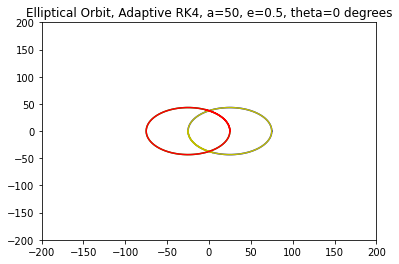

In [16]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Elliptical Orbit, Adaptive RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

Adaptive RK4 orbits run and superficially look correct. 

In [17]:
def getfocus(a,ecc):
    c=a*ecc
    return c

In [18]:
def getsemiminor(a,ecc):
    c=getfocus(a,ecc)
    b=np.sqrt(a**2-c**2)
    return b

In [19]:
def getxtheory2(theta0,ecc0,rad0,t, sgn):
    focus=getfocus(rad0,ecc0)
    b=getsemiminor(rad0,ecc0)
    xdim=rad0
    ydim=b
    xtheory=sgn*focus*np.cos(theta0)+xdim*np.cos(t)*np.cos(theta0)-ydim*np.sin(t)*np.sin(theta0)
    return xtheory

In [20]:
def getytheory2(theta0, ecc0, rad0, t, sgn):
    focus = getfocus(rad0,ecc0)
    b=getsemiminor(rad0,ecc0)
    xdim=rad0
    ydim=b
    ytheory=sgn*focus*np.sin(theta0)+ydim*np.cos(theta0)*np.sin(t)+xdim*np.sin(theta0)*np.cos(t)
    return ytheory



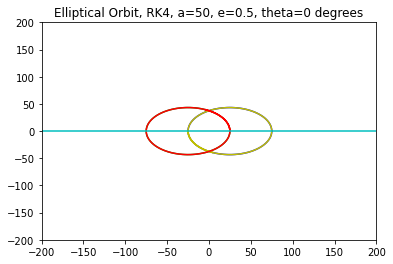

In [21]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2
oneellipse=int(len(npdt))
plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

With adaptive step size I get inspirals!

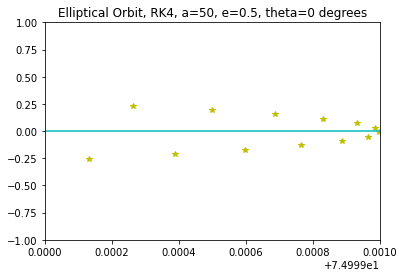

In [22]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'*y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

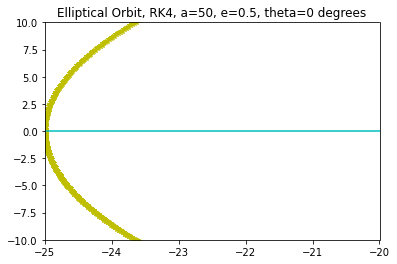

In [23]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [24]:
nperr

array([0.00000000e+00, 4.08248290e-05, 4.29472916e-05, ...,
       2.91843236e-03, 2.91595332e-03, 2.91347777e-03])

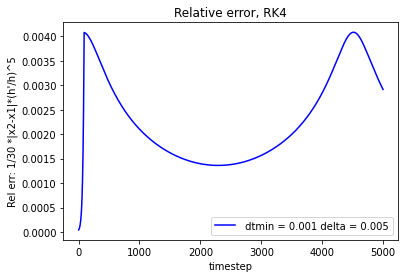

In [25]:


plt.xlabel("timestep")
plt.ylabel("Rel err: 1/30 *|x2-x1|*(h'/h)^5")
plt.title("Relative error, RK4")
relerrplt,=plt.plot(np.arange(2,oneellipse),nperr[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))
plt.legend(handles=[relerrplt])
plt.show()

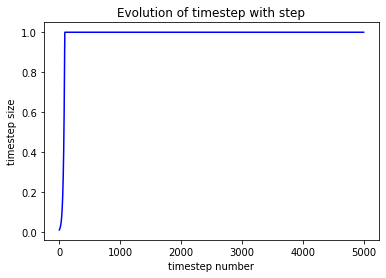

In [26]:


plt.xlabel("timestep number")
plt.ylabel("timestep size")
plt.title("Evolution of timestep with step")
relerrplt,=plt.plot(np.arange(2,oneellipse),npdt[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))

plt.show()

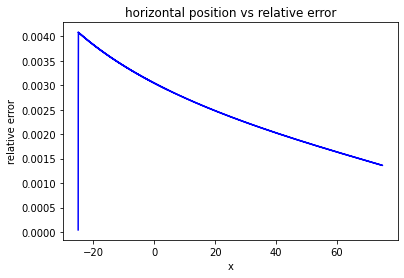

In [27]:
plt.xlabel("x")
plt.ylabel("relative error")
plt.title("horizontal position vs relative error")
plt.plot(npstar1x[2:oneellipse,0], nperr[2:oneellipse],'b')
plt.show()

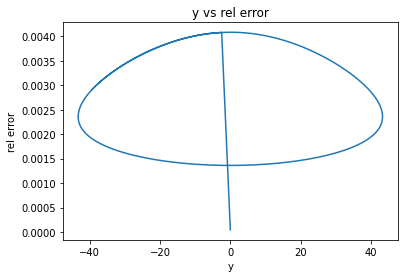

In [28]:
plt.xlabel("y")
plt.ylabel("rel error")
plt.title("y vs rel error")
plt.plot(npstar1x[2:oneellipse,1],nperr[2:oneellipse])
plt.show()

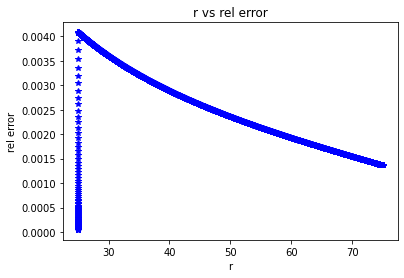

In [29]:
plt.xlabel("r")
plt.ylabel("rel error")
plt.title("r vs rel error")
rstar1x=np.sqrt(npstar1x[:,0]**2+npstar1x[:,1]**2)
plt.plot(rstar1x[2:oneellipse],nperr[2:oneellipse],'*b')
plt.show()

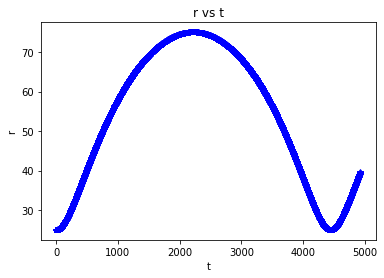

In [30]:
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t")
plt.plot(nptimes[2:oneellipse], rstar1x[2:oneellipse], '*b')
plt.show()

is the error spiking at the inflection point in r? It's not spiking at the absolute minimum in y or the absolute minimum in r. that would be the starting point. It's waiting a couple of timesteps to spike. 

In [31]:
thetaellipse = np.arctan2(npstar1x[2:oneellipse,1],npstar1x[2:oneellipse,0])

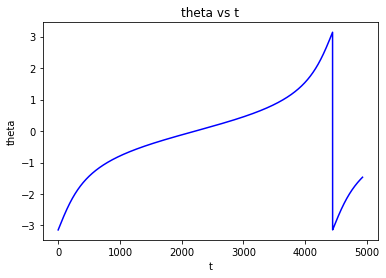

In [32]:
plt.xlabel("t")
plt.ylabel("theta")
plt.title("theta vs t")
plt.plot(nptimes[2:oneellipse],thetaellipse,'b')
plt.show()

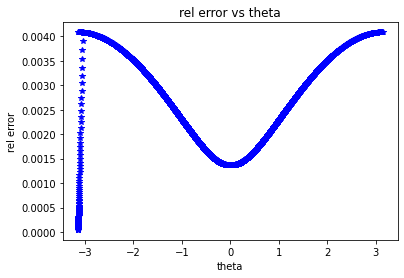

In [33]:
plt.xlabel("theta")
plt.ylabel("rel error")
plt.title("rel error vs theta")
plt.plot(thetaellipse, nperr[2:oneellipse],'*b')
plt.show()


I was wrong. It evolves initially in the negative theta direction. It has a rapidly increasing linear error with theta. I don't know why. This is unfortunate. 

# Conservation of angular momentum

In [34]:
import Lstability

In [35]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

(3.6694848932711027e-14, -2.041241452319287)

In [36]:
deltaL*Lavg

-7.49030467280439e-14

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [37]:
import Estability

In [38]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

(1.1485732186482615e-12, -0.00500000000002068)

In [39]:
deltaE*Eavg

-5.74286609326506e-15

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [40]:
import orbitSymmetricTol

In [41]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [42]:
allcancelsx

1e-14

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [43]:
allcancelsa

1e-14

In [44]:
npstar1x

array([[-2.50000000e+01,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -1.22474487e-01,  0.00000000e+00],
       [-2.50000000e+01, -1.22474487e-03,  0.00000000e+00,
         4.00000000e-06, -1.22474487e-01,  0.00000000e+00],
       [-2.49999999e+01, -2.51316362e-03,  0.00000000e+00,
         8.20795800e-06, -1.22474487e-01,  0.00000000e+00],
       ...,
       [ 3.91387192e+00, -3.92623408e+01,  0.00000000e+00,
         8.12469752e-02, -3.27257130e-02,  0.00000000e+00],
       [ 3.99511089e+00, -3.92949866e+01,  0.00000000e+00,
         8.12309063e-02, -3.25661043e-02,  0.00000000e+00],
       [ 4.07633364e+00, -3.93274731e+01,  0.00000000e+00,
         8.12145577e-02, -3.24068554e-02,  0.00000000e+00]])

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [45]:
import aeTest

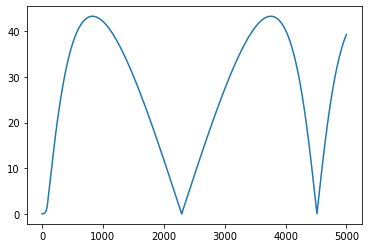

In [46]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [47]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [48]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

2284
456
1827
1.2501368363437328
4515
4515 2284
1.9767950963222416


In [49]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [50]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

(2284,
 4515,
 [74.99809929148442, -0.37755845883426514],
 [-24.999980755560824, -0.03799121762636111],
 74.99904964548013,
 25.000009622218716,
 0.4999951038480603,
 49.99952963384942,
 9.792303879430087e-06,
 9.407323011600965e-06)

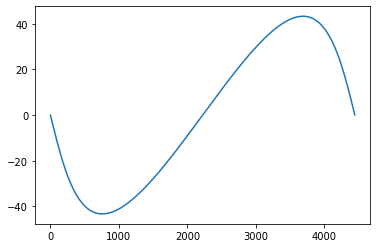

In [51]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [52]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [53]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [54]:
ellipsecenter

array([24.99905927, -0.20777484])

In [55]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [56]:
(np.array(coordap)+np.array(coordper))/2

array([24.99905927, -0.20777484])

In [57]:
getEllipsecenter(ecc0,rad0,theta0, True)

[-25.0, -0.0]

In [58]:
np.arctan2(-1.,0)/math.pi*180

-90.0

In [59]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [60]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

-3.1412939168636456

In [61]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [62]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [63]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [64]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [65]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [66]:
endindex

4515

In [67]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

4514
[50.         49.99999998 49.99999992 ... 49.99727719 49.99855303
 49.99942892] [ 0.          0.00122474  0.00251316 ... -0.45189032 -0.32942588
 -0.20695617] [0.00000000e+00 1.40345424e-03 2.87987338e-03 ... 3.59482158e+02
 3.59622500e+02 3.59762844e+02]
Eang [0.00000000e+00 2.44948974e-05 5.02632725e-05 ... 6.27414725e+00
 6.27659669e+00 6.27904616e+00]


In [68]:
nptimesoneorbit=nptimes[0:endindex-1]

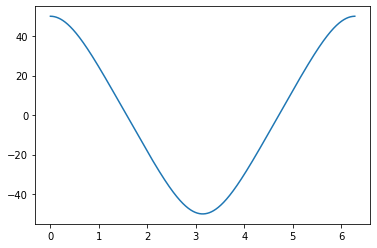

In [69]:
plt.plot(Eang0, xE0)

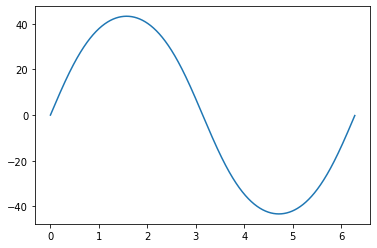

In [70]:
plt.plot(Eang0, yE0)

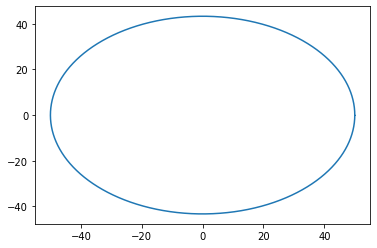

In [71]:
plt.plot(xE0,yE0)

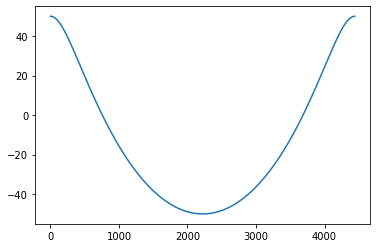

In [72]:
plt.plot(nptimesoneorbit,xE0)

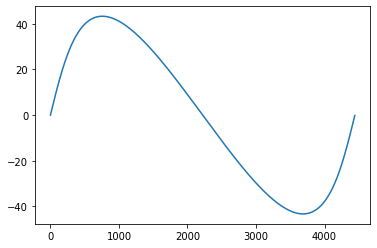

In [73]:
plt.plot(nptimesoneorbit,yE0)

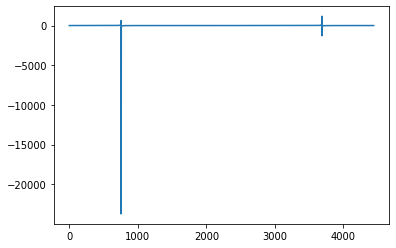

In [74]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [75]:
np.arctan(0./1.)

0.0

In [76]:
yE0[0]

0.0

In [77]:
xE0[0]

50.0

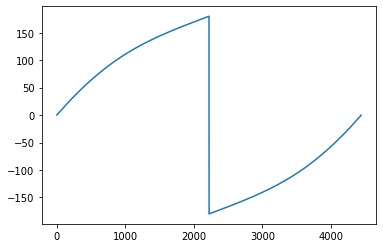

In [78]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [79]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

4514
[50.         49.99999998 49.99999992 ... 49.99727719 49.99855303
 49.99942892] [ 0.          0.00122474  0.00251316 ... -0.45189032 -0.32942588
 -0.20695617] [0.00000000e+00 1.40345424e-03 2.87987338e-03 ... 3.59482158e+02
 3.59622500e+02 3.59762844e+02]
Eang [0.00000000e+00 2.44948974e-05 5.02632725e-05 ... 6.27414725e+00
 6.27659669e+00 6.27904616e+00]
[0.00000000e+00 2.44948974e-05 5.02632725e-05 ... 6.27414725e+00
 6.27659669e+00 6.27904616e+00] 0.5 50 1.0 [0.00000000e+00 8.66025404e-03 1.77707504e-02 ... 4.43968746e+03
 4.44055349e+03 4.44141952e+03]


In [80]:
np.max(Eangtest)

4441.419524502926

In [81]:
nptimes[0]

0.0

In [82]:
nptimesoneorbit=nptimes[0:endindex-1]

In [83]:
tpredoneorbit=Eangtest[0:endindex-1]

In [84]:
Eangoneorbit=Eang0[0:endindex-1]

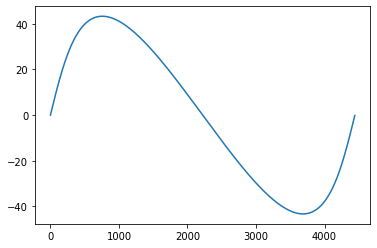

In [85]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

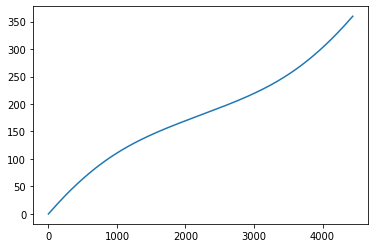

In [86]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

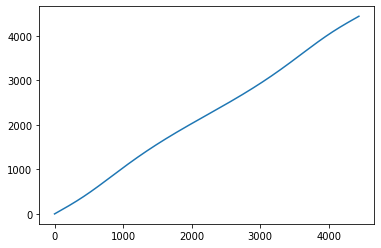

In [87]:
plt.plot(nptimesoneorbit,tpredoneorbit)

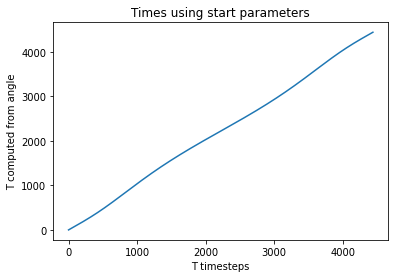

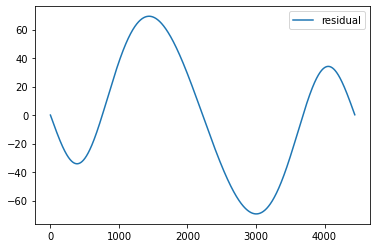

In [88]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


# THERE IS A SECOND HARMONIC IN THIS TIMING DATA!!! I have heard of orbital resonances. Is that what I am seeing?

In [89]:
from matplotlib import pyplot as plt

Arctan function is giving tangent output. I'm done for today. I'm asking for help on this, either Steve or on a forum. Clearly something really weird is going on. This is a distinct problem from the retrograde motion I had before I fixed the center, which you can tell from the sharply spiked top as opposed to the curved top I had before. Now the center appears to be in the correct location but there is some problem related to tangent versus arctangent. 

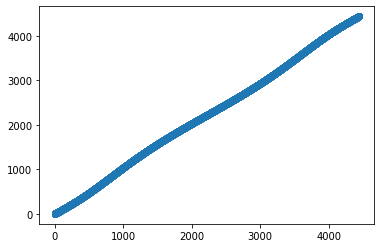

In [90]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

Retrograde motion as seen from the center of mass. I'm not sure that makes sense. So there's a problem with the definition of the Eang. The problem might be with the ellipse center, which probably shouldn't be at x=-70, if it spans between +5 and -95. 

In [91]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

4514
[50.         49.99999998 49.99999992 ... 49.99727719 49.99855303
 49.99942892] [ 0.          0.00122474  0.00251316 ... -0.45189032 -0.32942588
 -0.20695617] [0.00000000e+00 1.40345424e-03 2.87987338e-03 ... 3.59482158e+02
 3.59622500e+02 3.59762844e+02]
Eang [0.00000000e+00 2.44948974e-05 5.02632725e-05 ... 6.27414725e+00
 6.27659669e+00 6.27904616e+00]
[0.00000000e+00 2.44948974e-05 5.02632725e-05 ... 6.27414725e+00
 6.27659669e+00 6.27904616e+00] <Parameter 'ecc', value=0.5, bounds=[0:1.0]> <Parameter 'rad', value=50.0, bounds=[0:inf]> <Parameter 'mass', value=1.0 (fixed), bounds=[-inf:inf]> [0.00000000e+00 8.66025404e-03 1.77707504e-02 ... 4.43968746e+03
 4.44055349e+03 4.44141952e+03]
4514
[50.         49.99999998 49.99999992 ... 49.99727719 49.99855303
 49.99942892] [ 0.          0.00122474  0.00251316 ... -0.45189032 -0.32942588
 -0.20695617] [0.00000000e+00 1.40345424e-03 2.87987338e-03 ... 3.59482158e+02
 3.59622500e+02 3.59762844e+02]
Eang [0.00000000e+00 2.44948974e-05 

In [92]:
outt

Eccentricity fit is still not great for eccentricity of 0.9 (0.99), but radius fit is pretty good. The chi square is enormous. Eccentricity of 0.5 looks somewhat better (ecc 0.51) but still has a large chisquared and generates a potentially helpful divide by zero warning in the fit. 

In [93]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

4441.193135200203

Updated Jupyter and python packages and angular momentum and energy conservation improved by many orders of magnitude, but the fit is about the same. deltaL and deltaE are now consistent with roundoff error. 

In [94]:
from scipy.fft import fft

In [95]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [96]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [97]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

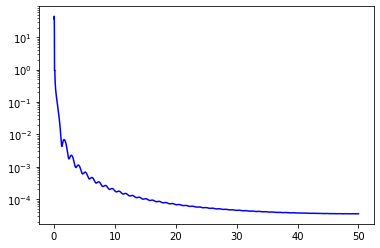

In [98]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [99]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

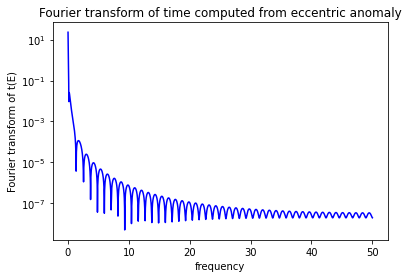

In [100]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

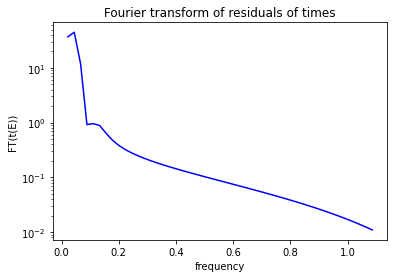

In [101]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

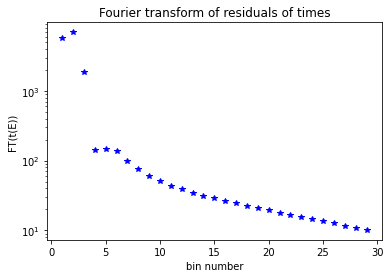

In [102]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5